In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import Latex

In [2]:
import snakes.plugins
nets = snakes.plugins.load('gv', 'snakes.nets', 'nets')
from nets import (Place, PetriNet, Transition, MultiSet, 
                  Expression, Marking, OneOf, Substitution, 
                  Test, Tuple, Variable,Value)
from IPython.display import Image, SVG

### Baseline Determinisitic Firing Squad Model

In [3]:
def firing_squad_deterministic_petri():
    n = PetriNet("FiringSquad")
    
    n.add_place(Place("Init"))
    
    
    n.add_place(Place("Court = NoOrder"))
    n.add_place(Place("Court = Order"))
    
    n.add_place(Place("Captain = Signal"))
    n.add_place(Place("Captain = NoSignal"))
    
    n.add_place(Place("RiflemanA = NoShoot"))
    n.add_place(Place("RiflemanA = Shoot"))
    n.add_place(Place("RiflemanB = NoShoot"))
    n.add_place(Place("RiflemanB = Shoot"))
    
    n.add_place(Place("Prisoner = Alive"))
    n.add_place(Place("Prisoner = Dead"))
    
    
    
    n.add_transition(Transition("court_decision_is_unknown" ))    
    
    n.add_transition(Transition("captain_signals_if_court_orders" ))
    n.add_transition(Transition("captain_does_not_signal_if_court_does_not_order" ))
    
    n.add_transition(Transition("rifleman_A_shoots_if_captain_signals" ))
    n.add_transition(Transition("rifleman_A_does_not_shoot_if_captain_does_not_signal" ))

    n.add_transition(Transition("rifleman_B_shoots_if_captain_signals" ))
    n.add_transition(Transition("rifleman_B_does_not_shoot_if_captain_does_not_signal" ))

    n.add_transition(Transition("prisoner_dies_if_rifleman_A_shoots"))
    n.add_transition(Transition("prisoner_dies_if_rifleman_B_shoots"))
    
    n.add_transition(Transition("prisoner_lives_if_riflemen_A_and_B_do_not_shoot"))


    
    
    n.add_input("Init", "court_decision_is_unknown", Value(1))
    n.add_output("Court = NoOrder", "court_decision_is_unknown", Value(0.5))
    n.add_output("Court = Order", "court_decision_is_unknown", Value(0.5))
    
    n.add_input("Court = NoOrder", "captain_does_not_signal_if_court_does_not_order", Value(1))
    n.add_output("Captain = NoSignal", "captain_does_not_signal_if_court_does_not_order", Value(1))
   
    n.add_input("Court = Order", "captain_signals_if_court_orders", Value(1))
    n.add_output("Captain = Signal", "captain_signals_if_court_orders", Value(1))

    n.add_input("Captain = Signal", "rifleman_A_shoots_if_captain_signals", Value(1))
    n.add_output("RiflemanA = Shoot", "rifleman_A_shoots_if_captain_signals", Value(1))

    n.add_input("Captain = NoSignal", "rifleman_A_does_not_shoot_if_captain_does_not_signal", Value(1))
    n.add_output("RiflemanA = NoShoot", "rifleman_A_does_not_shoot_if_captain_does_not_signal", Value(1))
    
    n.add_input("Captain = Signal", "rifleman_B_shoots_if_captain_signals", Value(1))
    n.add_output("RiflemanB = Shoot", "rifleman_B_shoots_if_captain_signals", Value(1))

    n.add_input("Captain = NoSignal",   "rifleman_B_does_not_shoot_if_captain_does_not_signal", Value(1))
    n.add_output("RiflemanB = NoShoot", "rifleman_B_does_not_shoot_if_captain_does_not_signal", Value(1))
    
    n.add_input("RiflemanA = Shoot", "prisoner_dies_if_rifleman_A_shoots", Value(1))
    n.add_output("Prisoner = Dead",  "prisoner_dies_if_rifleman_A_shoots", Value(1))
    
    n.add_input("RiflemanA = NoShoot", "prisoner_lives_if_riflemen_A_and_B_do_not_shoot", Value(1))
    n.add_input("RiflemanB = NoShoot", "prisoner_lives_if_riflemen_A_and_B_do_not_shoot", Value(1))
    n.add_output("Prisoner = Alive",   "prisoner_lives_if_riflemen_A_and_B_do_not_shoot", Value(1))
    
    n.add_input("RiflemanB = Shoot", "prisoner_dies_if_rifleman_B_shoots", Value(1))
    n.add_output("Prisoner = Dead",  "prisoner_dies_if_rifleman_B_shoots", Value(1))    

    return n

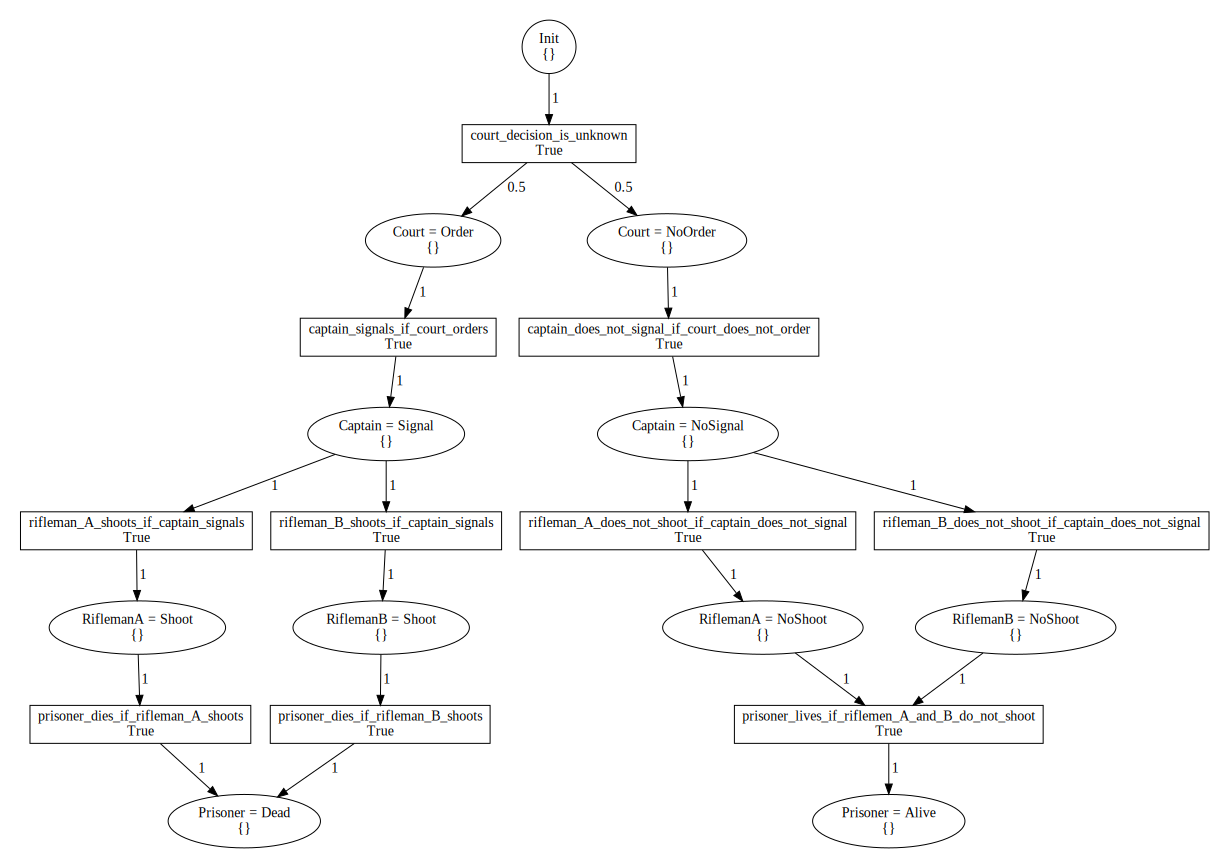

In [4]:
fs = firing_squad_deterministic_petri()
fs.draw('../images/firing_squad_deterministic_petri.svg')
fs.draw('../images/firing_squad_deterministic_petri.png')

SVG('../images/firing_squad_deterministic_petri.svg')



## S1: Prediction
 If rifleman A did not shoot, then the prisoner is alive.
 
 $$\lnot A\implies \lnot D$$
 
 

In [16]:
def firing_squad_deterministic_petri_condition():
    n = PetriNet("FiringSquad")
    
    n.add_place(Place("Init"))
    
    
    n.add_place(Place("Court = NoOrder"))
    n.add_place(Place("Court = Order"))
    
    n.add_place(Place("Captain = Signal"))
    n.add_place(Place("Captain = NoSignal"))
    
    n.add_place(Place("RiflemanA = NoShoot"))
    n.add_place(Place("RiflemanA = Shoot"))
    n.add_place(Place("RiflemanB = NoShoot"))
    n.add_place(Place("RiflemanB = Shoot"))
    
    n.add_place(Place("Prisoner = Alive"))
    n.add_place(Place("Prisoner = Dead"))
    
    
    
    n.add_transition(Transition("court_decision_is_unknown" ))    
    
    n.add_transition(Transition("captain_signals_if_court_orders" ))
    n.add_transition(Transition("captain_does_not_signal_if_court_does_not_order" ))
    
    n.add_transition(Transition("rifleman_A_shoots_if_captain_signals" ))
    n.add_transition(Transition("rifleman_A_does_not_shoot_if_captain_does_not_signal" ))

    n.add_transition(Transition("rifleman_B_shoots_if_captain_signals" ))
    n.add_transition(Transition("rifleman_B_does_not_shoot_if_captain_does_not_signal" ))

    n.add_transition(Transition("prisoner_dies_if_rifleman_A_shoots"))
    n.add_transition(Transition("prisoner_dies_if_rifleman_B_shoots"))
    
    n.add_transition(Transition("prisoner_lives_if_riflemen_A_and_B_do_not_shoot"))


    
    
    n.add_input("Init", "court_decision_is_unknown", Value(1))
    n.add_output("Court = NoOrder", "court_decision_is_unknown", Value(1))
    n.add_output("Court = Order", "court_decision_is_unknown", Value(0))
    
    n.add_input("Court = NoOrder", "captain_does_not_signal_if_court_does_not_order", Value(1))
    n.add_output("Captain = NoSignal", "captain_does_not_signal_if_court_does_not_order", Value(1))
   
    n.add_input("Court = Order", "captain_signals_if_court_orders", Value(1))
    n.add_output("Captain = Signal", "captain_signals_if_court_orders", Value(1))

    n.add_input("Captain = Signal", "rifleman_A_shoots_if_captain_signals", Value(1))
    n.add_output("RiflemanA = Shoot", "rifleman_A_shoots_if_captain_signals", Value(1))

    n.add_input("Captain = NoSignal", "rifleman_A_does_not_shoot_if_captain_does_not_signal", Value(1))
    n.add_output("RiflemanA = NoShoot", "rifleman_A_does_not_shoot_if_captain_does_not_signal", Value(1))
    
    n.add_input("Captain = Signal", "rifleman_B_shoots_if_captain_signals", Value(1))
    n.add_output("RiflemanB = Shoot", "rifleman_B_shoots_if_captain_signals", Value(1))

    n.add_input("Captain = NoSignal",   "rifleman_B_does_not_shoot_if_captain_does_not_signal", Value(1))
    n.add_output("RiflemanB = NoShoot", "rifleman_B_does_not_shoot_if_captain_does_not_signal", Value(1))
    
    n.add_input("RiflemanA = Shoot", "prisoner_dies_if_rifleman_A_shoots", Value(1))
    n.add_output("Prisoner = Dead",  "prisoner_dies_if_rifleman_A_shoots", Value(1))
    
    n.add_input("RiflemanA = NoShoot", "prisoner_lives_if_riflemen_A_and_B_do_not_shoot", Value(1))
    n.add_input("RiflemanB = NoShoot", "prisoner_lives_if_riflemen_A_and_B_do_not_shoot", Value(1))
    n.add_output("Prisoner = Alive",   "prisoner_lives_if_riflemen_A_and_B_do_not_shoot", Value(1))
    
    n.add_input("RiflemanB = Shoot", "prisoner_dies_if_rifleman_B_shoots", Value(1))
    n.add_output("Prisoner = Dead",  "prisoner_dies_if_rifleman_B_shoots", Value(1))    

    return n

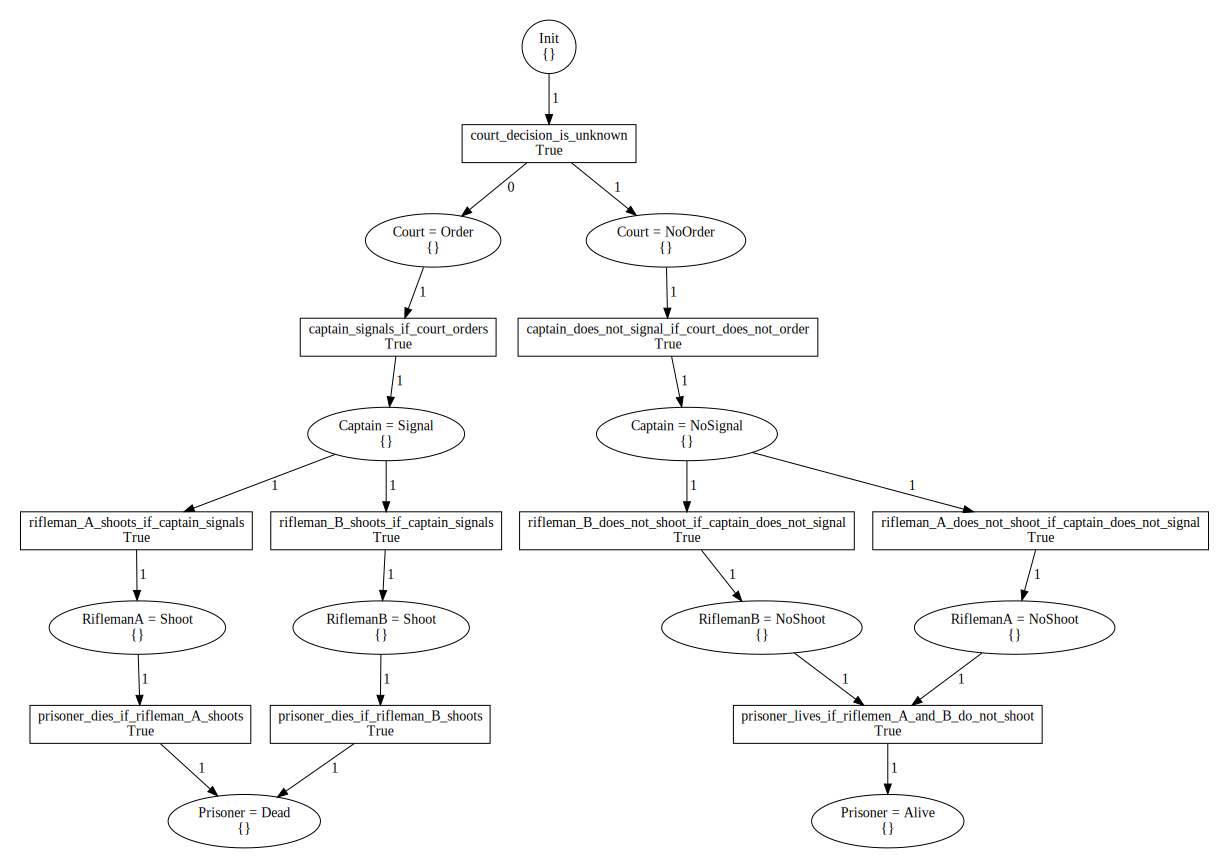

In [17]:
seeAnoshoot = firing_squad_deterministic_petri_condition()
seeAnoshoot.draw('../images/firing_squad_deterministic_petri_condition.svg')
seeAnoshoot.draw('../images/firing_squad_deterministic_petri_condition.png')

SVG('../images/firing_squad_deterministic_petri_condition.svg')

## S4 Action
If the captain gave no signal and rifleman A decides to shoot, then the prisoner will die and B will not shoot.

$$\lnot C\implies D_A \wedge \lnot B_{A}$$

In [18]:
def firing_squad_deterministic_petri_intervention():
    n = PetriNet("FiringSquad")
    
    n.add_place(Place("Init"))
    
    
    n.add_place(Place("Court = NoOrder"))
    n.add_place(Place("Court = Order"))
    
    n.add_place(Place("Captain = Signal"))
    n.add_place(Place("Captain = NoSignal"))
    
    n.add_place(Place("RiflemanA = NoShoot"))
    n.add_place(Place("RiflemanA = Shoot"))
    n.add_place(Place("RiflemanB = NoShoot"))
    n.add_place(Place("RiflemanB = Shoot"))
    
    n.add_place(Place("Prisoner = Alive"))
    n.add_place(Place("Prisoner = Dead"))
    
    
    
    n.add_transition(Transition("court_decision_is_unknown" ))    
    
    n.add_transition(Transition("captain_signals_if_court_orders" ))
    n.add_transition(Transition("captain_does_not_signal_if_court_does_not_order" ))
    

    n.add_transition(Transition("rifleman_B_shoots_if_captain_signals" ))
    n.add_transition(Transition("rifleman_B_does_not_shoot_if_captain_does_not_signal" ))

    n.add_transition(Transition("prisoner_dies_if_rifleman_A_shoots"))
    n.add_transition(Transition("prisoner_dies_if_rifleman_B_shoots"))
    
    n.add_transition(Transition("prisoner_lives_if_riflemen_A_and_B_do_not_shoot"))


    
    
    n.add_input("Init", "court_decision_is_unknown", Value(1))
    n.add_output("Court = NoOrder", "court_decision_is_unknown", Value(1))
    n.add_output("Court = Order", "court_decision_is_unknown", Value(0))
    
    n.add_input("Court = NoOrder", "captain_does_not_signal_if_court_does_not_order", Value(1))
    n.add_output("Captain = NoSignal", "captain_does_not_signal_if_court_does_not_order", Value(1))
   
    n.add_input("Court = Order", "captain_signals_if_court_orders", Value(1))
    n.add_output("Captain = Signal", "captain_signals_if_court_orders", Value(1))

    
    n.add_input("Captain = Signal", "rifleman_B_shoots_if_captain_signals", Value(1))
    n.add_output("RiflemanB = Shoot", "rifleman_B_shoots_if_captain_signals", Value(1))

    n.add_input("Captain = NoSignal",   "rifleman_B_does_not_shoot_if_captain_does_not_signal", Value(1))
    n.add_output("RiflemanB = NoShoot", "rifleman_B_does_not_shoot_if_captain_does_not_signal", Value(1))
    
    n.add_input("RiflemanA = Shoot", "prisoner_dies_if_rifleman_A_shoots", Value(1))
    n.add_output("Prisoner = Dead",  "prisoner_dies_if_rifleman_A_shoots", Value(1))
    
    n.add_input("RiflemanA = NoShoot", "prisoner_lives_if_riflemen_A_and_B_do_not_shoot", Value(0))
    n.add_input("RiflemanB = NoShoot", "prisoner_lives_if_riflemen_A_and_B_do_not_shoot", Value(1))
    n.add_output("Prisoner = Alive",   "prisoner_lives_if_riflemen_A_and_B_do_not_shoot", Value(1))
    
    n.add_input("RiflemanB = Shoot", "prisoner_dies_if_rifleman_B_shoots", Value(1))
    n.add_output("Prisoner = Dead",  "prisoner_dies_if_rifleman_B_shoots", Value(1))    

    return n

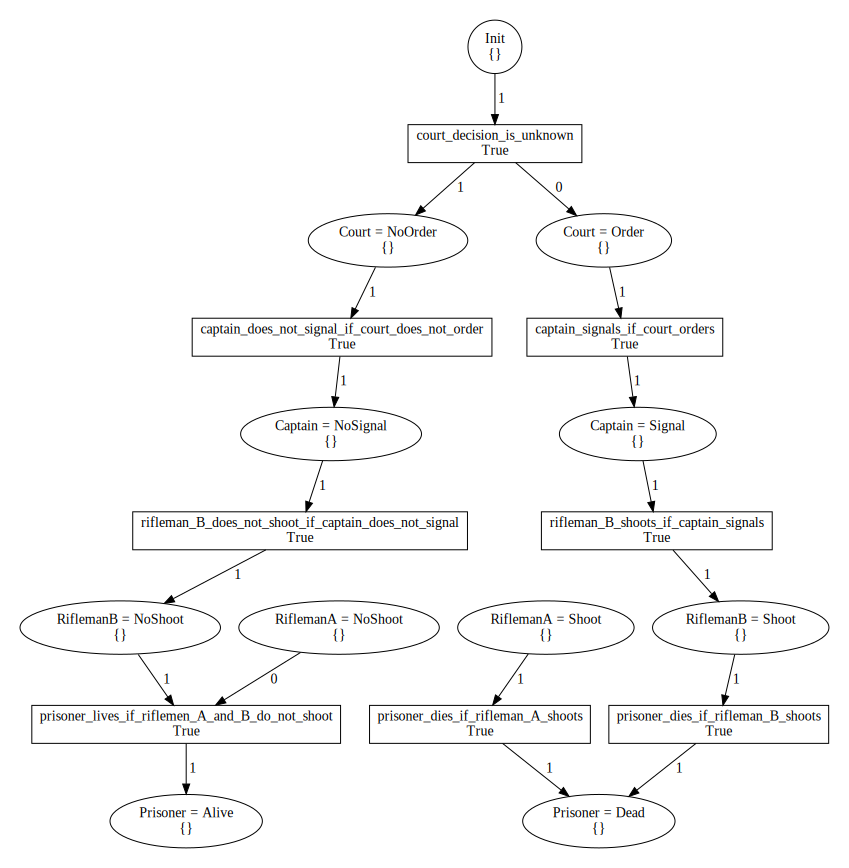

In [19]:
doAshoots = firing_squad_deterministic_petri_intervention()
doAshoots.draw('../images/firing_squad_deterministic_petri_intervention.svg')
doAshoots.draw('../images/firing_squad_deterministic_petri_intervention.png')

SVG('../images/firing_squad_deterministic_petri_intervention.svg')

## S5 Counterfactual

If the prisoner is dead, then the prisoner would be dead even if rifleman A had not shot

$$D\implies D_{\lnot A}$$

In [14]:
def firing_squad_deterministic_petri_intervention():
    n = PetriNet("FiringSquad")
    
    n.add_place(Place("Init"))
    
    
    n.add_place(Place("Court = NoOrder"))
    n.add_place(Place("Court = Order"))
    
    n.add_place(Place("Captain = Signal"))
    n.add_place(Place("Captain = NoSignal"))
    
    n.add_place(Place("RiflemanA = NoShoot"))
    n.add_place(Place("RiflemanA = Shoot"))
    n.add_place(Place("RiflemanB = NoShoot"))
    n.add_place(Place("RiflemanB = Shoot"))
    
    n.add_place(Place("Prisoner = Alive"))
    n.add_place(Place("Prisoner = Dead"))
    
    
    
    n.add_transition(Transition("court_decision_is_unknown" ))    
    
    n.add_transition(Transition("captain_signals_if_court_orders" ))
    n.add_transition(Transition("captain_does_not_signal_if_court_does_not_order" ))
    

    n.add_transition(Transition("rifleman_B_shoots_if_captain_signals" ))
    n.add_transition(Transition("rifleman_B_does_not_shoot_if_captain_does_not_signal" ))

    n.add_transition(Transition("prisoner_dies_if_rifleman_A_shoots"))
    n.add_transition(Transition("prisoner_dies_if_rifleman_B_shoots"))
    
    n.add_transition(Transition("prisoner_lives_if_riflemen_A_and_B_do_not_shoot"))


    
    
    n.add_input("Init", "court_decision_is_unknown", Value(1))
    n.add_output("Court = NoOrder", "court_decision_is_unknown", Value(0))
    n.add_output("Court = Order", "court_decision_is_unknown", Value(1))
    
    n.add_input("Court = NoOrder", "captain_does_not_signal_if_court_does_not_order", Value(1))
    n.add_output("Captain = NoSignal", "captain_does_not_signal_if_court_does_not_order", Value(1))
   
    n.add_input("Court = Order", "captain_signals_if_court_orders", Value(1))
    n.add_output("Captain = Signal", "captain_signals_if_court_orders", Value(1))

    
    n.add_input("Captain = Signal", "rifleman_B_shoots_if_captain_signals", Value(1))
    n.add_output("RiflemanB = Shoot", "rifleman_B_shoots_if_captain_signals", Value(1))

    n.add_input("Captain = NoSignal",   "rifleman_B_does_not_shoot_if_captain_does_not_signal", Value(1))
    n.add_output("RiflemanB = NoShoot", "rifleman_B_does_not_shoot_if_captain_does_not_signal", Value(1))
    
    n.add_input("RiflemanA = Shoot", "prisoner_dies_if_rifleman_A_shoots", Value(0))
    n.add_output("Prisoner = Dead",  "prisoner_dies_if_rifleman_A_shoots", Value(1))
    
    n.add_input("RiflemanA = NoShoot", "prisoner_lives_if_riflemen_A_and_B_do_not_shoot", Value(1))
    n.add_input("RiflemanB = NoShoot", "prisoner_lives_if_riflemen_A_and_B_do_not_shoot", Value(1))
    n.add_output("Prisoner = Alive",   "prisoner_lives_if_riflemen_A_and_B_do_not_shoot", Value(1))
    
    n.add_input("RiflemanB = Shoot", "prisoner_dies_if_rifleman_B_shoots", Value(1))
    n.add_output("Prisoner = Dead",  "prisoner_dies_if_rifleman_B_shoots", Value(1))    

    return n

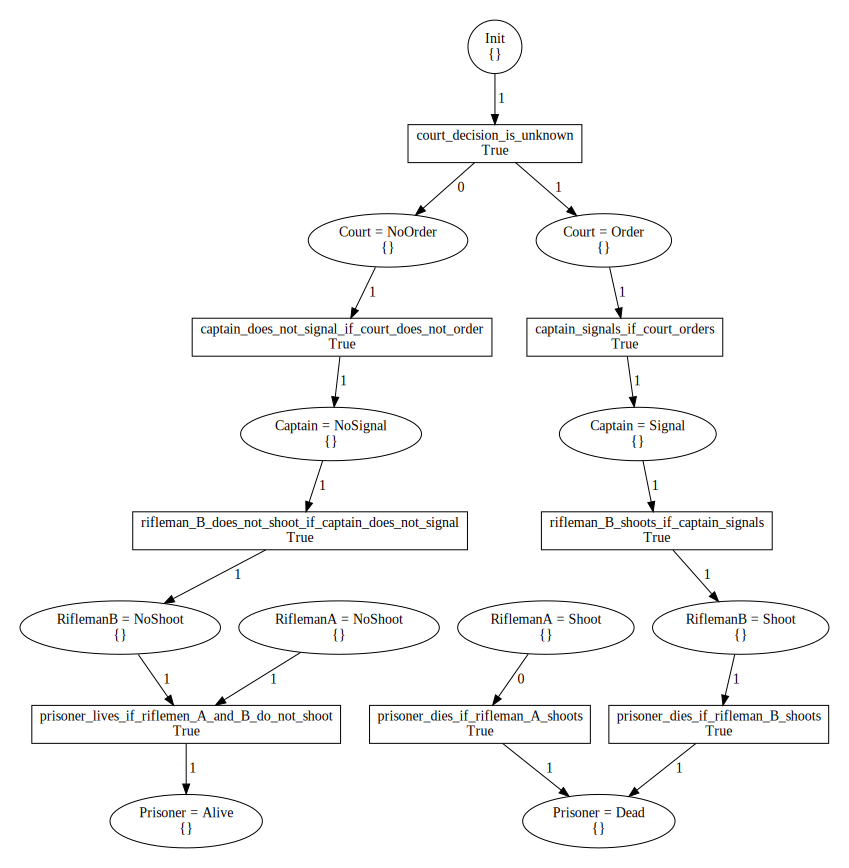

In [15]:
seeDdoAshoots = firing_squad_deterministic_petri_intervention()
seeDdoAshoots.draw('../images/firing_squad_deterministic_petri_counterfactual.svg')
seeDdoAshoots.draw('../images/firing_squad_deterministic_petri_counterfactual.png')

SVG('../images/firing_squad_deterministic_petri_counterfactual.svg')